In [121]:
# Analyze
# What is happening in the dataset

In [122]:
import pandas as pd

In [123]:
df = pd.read_csv("Backend_logs.csv")

In [124]:
df

,Operation,Request time,Response time
0,GetTrackingData,1/1/2023 10:00:23.000,1/1/2023 10:00:23.300
1,SetPayment,1/1/2023 10:13:14.230,1/1/2023 10:13:15.697
2,SetPayment,1/1/2023 10:26:05.460,1/1/2023 10:26:06.410
3,GetPaymentMethods,1/1/2023 10:38:56.690,1/1/2023 10:38:57.057
4,SetDeliveryAddress,1/1/2023 10:51:47.920,1/1/2023 10:51:48.620
...,...,...,...
9994,ModifyItem,31/3/2023 15:01:35.621,31/3/2023 15:01:38.387
9995,SetDeliveryAddress,31/3/2023 15:14:26.851,31/3/2023 15:14:27.284
9996,SetPayment,31/3/2023 15:27:18.081,31/3/2023 15:27:19.331
9997,SetDeliveryAddress,31/3/2023 15:40:09.311,31/3/2023 15:40:09.861


In [125]:
# 3 months

In [126]:
df.Operation.value_counts()

GetPaymentMethods     787
GetTrackingData       742
GetOrderList          739
GetItem               736
Login                 733
ModifyItem            732
GetOrder              727
SendNotification      711
ModifyOrder           709
AddItemToOrder        699
SetPayment            689
GetPaymentList        682
SetDeliveryAddress    664
GetItemList           649
Name: Operation, dtype: int64

In [127]:
df.dtypes

Operation        object
Request time     object
Response time    object
dtype: object

In [128]:
df.columns

Index(['Operation', 'Request time', 'Response time'], dtype='object')

In [129]:
df.rename({"Operation": "operation", "Request time": 'request_time', 'Response time': 'response_time'}, 
          inplace=True, axis=1)

In [130]:
df

,operation,request_time,response_time
0,GetTrackingData,1/1/2023 10:00:23.000,1/1/2023 10:00:23.300
1,SetPayment,1/1/2023 10:13:14.230,1/1/2023 10:13:15.697
2,SetPayment,1/1/2023 10:26:05.460,1/1/2023 10:26:06.410
3,GetPaymentMethods,1/1/2023 10:38:56.690,1/1/2023 10:38:57.057
4,SetDeliveryAddress,1/1/2023 10:51:47.920,1/1/2023 10:51:48.620
...,...,...,...
9994,ModifyItem,31/3/2023 15:01:35.621,31/3/2023 15:01:38.387
9995,SetDeliveryAddress,31/3/2023 15:14:26.851,31/3/2023 15:14:27.284
9996,SetPayment,31/3/2023 15:27:18.081,31/3/2023 15:27:19.331
9997,SetDeliveryAddress,31/3/2023 15:40:09.311,31/3/2023 15:40:09.861


In [133]:
df.request_time = pd.to_datetime(df.request_time, errors='coerce')
df.response_time = pd.to_datetime(df.response_time, errors='coerce')

In [111]:
df.isnull().sum()

operation        0
request_time     4
response_time    7
dtype: int64

In [119]:
a = list(df[df.response_time.isnull()].index)
b = list(df[df.request_time.isnull()].index)
b.extend(a)

In [120]:
b

[585, 676, 2429, 7298, 507, 585, 708, 1856, 2429, 7122, 7306]

In [132]:
df[df.index.isin(b)]

,operation,request_time,response_time
507,AddItemToOrder,5/1/2023 22:37:16.610,##############################################...
585,GetPaymentMethods,djhgfwefbf,udfhdkhad
676,GetTrackingData,##############################################...,7/1/2023 10:49:35.347
708,GetOrderList,7/1/2023 17:40:53.840,0/1/1900 00:00:00.000
1856,GetPaymentMethods,17/1/2023 23:37:05.880,0/1/1900 00:00:00.000
2429,ModifyOrder,##############################################...,0/1/1900 00:00:00.000
7122,GetTrackingData,5/3/2023 23:45:23.061,000000000000000
7298,GetTrackingData,0000000000000,7/3/2023 13:27:40.924
7306,GetItem,7/3/2023 15:10:29.381,0/3/2023 15:10:29.547


In [134]:
df.dropna(subset=['request_time', 'response_time'], inplace=True)

In [135]:
df.head(3)

,operation,request_time,response_time
0,GetTrackingData,2023-01-01 10:00:23.000,2023-01-01 10:00:23.300
1,SetPayment,2023-01-01 10:13:14.230,2023-01-01 10:13:15.697
2,SetPayment,2023-01-01 10:26:05.460,2023-01-01 10:26:06.410


In [136]:
df['difference'] = df.response_time.sub(df.request_time).dt.components.milliseconds#.mul(1000).astype(int)

In [137]:
df[df.difference == 0] # those took 0 milliseconds whih may be odd

,operation,request_time,response_time,difference
51,GetOrder,2023-01-01 20:55:55.730,2023-01-01 20:55:56.730,0
112,GetItem,2023-02-01 10:00:00.760,2023-02-01 10:00:01.760,0
319,SetPayment,2023-04-01 06:20:45.370,2023-04-01 06:20:46.370,0
377,GetTrackingData,2023-04-01 18:46:16.710,2023-04-01 18:46:17.710,0
736,ModifyItem,2023-07-01 23:40:48.280,2023-07-01 23:40:52.280,0
...,...,...,...,...
9224,AddItemToOrder,2023-03-24 18:04:08.521,2023-03-24 18:04:09.521,0
9226,Login,2023-03-24 18:29:50.981,2023-03-24 18:29:51.981,0
9365,AddItemToOrder,2023-03-26 00:16:31.951,2023-03-26 00:16:32.951,0
9732,GetOrderList,2023-03-29 06:53:53.361,2023-03-29 06:53:54.361,0


In [138]:
df[df.difference == 0].operation.value_counts()

ModifyOrder           13
ModifyItem            12
GetItem               10
SetPayment             8
Login                  8
GetOrder               7
GetTrackingData        7
SendNotification       7
GetPaymentMethods      7
GetItemList            7
AddItemToOrder         6
GetOrderList           5
SetDeliveryAddress     5
GetPaymentList         3
Name: operation, dtype: int64

In [67]:
df[df.difference != 0]

,operation,request_time,response_time,difference
0,GetTrackingData,2023-01-01 10:00:23.000,2023-01-01 10:00:23.300,300
1,SetPayment,2023-01-01 10:13:14.230,2023-01-01 10:13:15.697,467
2,SetPayment,2023-01-01 10:26:05.460,2023-01-01 10:26:06.410,950
3,GetPaymentMethods,2023-01-01 10:38:56.690,2023-01-01 10:38:57.057,367
4,SetDeliveryAddress,2023-01-01 10:51:47.920,2023-01-01 10:51:48.620,700
...,...,...,...,...
9994,ModifyItem,2023-03-31 15:01:35.621,2023-03-31 15:01:38.387,766
9995,SetDeliveryAddress,2023-03-31 15:14:26.851,2023-03-31 15:14:27.284,433
9996,SetPayment,2023-03-31 15:27:18.081,2023-03-31 15:27:19.331,250
9997,SetDeliveryAddress,2023-03-31 15:40:09.311,2023-03-31 15:40:09.861,550


In [139]:
df[df.difference < 0]

,operation,request_time,response_time,difference


In [141]:
df[df.difference > 500]

,operation,request_time,response_time,difference
2,SetPayment,2023-01-01 10:26:05.460,2023-01-01 10:26:06.410,950
4,SetDeliveryAddress,2023-01-01 10:51:47.920,2023-01-01 10:51:48.620,700
13,SetPayment,2023-01-01 12:47:28.990,2023-01-01 12:47:29.557,567
14,GetPaymentMethods,2023-01-01 13:00:20.220,2023-01-01 13:00:21.003,783
21,GetTrackingData,2023-01-01 14:30:18.830,2023-01-01 14:30:19.530,700
...,...,...,...,...
9987,GetPaymentList,2023-03-31 13:31:37.011,2023-03-31 13:31:37.577,566
9988,GetItem,2023-03-31 13:44:28.241,2023-03-31 13:44:28.924,683
9993,SetPayment,2023-03-31 14:48:44.391,2023-03-31 14:48:45.357,966
9994,ModifyItem,2023-03-31 15:01:35.621,2023-03-31 15:01:38.387,766


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
df.difference.describe()

count    9990.00000
mean      435.86967
std       269.92872
min         0.00000
25%       200.00000
50%       417.00000
75%       634.00000
max       984.00000
Name: difference, dtype: float64

In [78]:
df[df.difference < 0 ]

,operation,request_time,response_time,difference


In [83]:
df['minute'] = df.difference / 1000

In [86]:
df[df.minute > 0]

,operation,request_time,response_time,difference,minute
0,GetTrackingData,2023-01-01 10:00:23.000,2023-01-01 10:00:23.300,300,0.300
1,SetPayment,2023-01-01 10:13:14.230,2023-01-01 10:13:15.697,467,0.467
2,SetPayment,2023-01-01 10:26:05.460,2023-01-01 10:26:06.410,950,0.950
3,GetPaymentMethods,2023-01-01 10:38:56.690,2023-01-01 10:38:57.057,367,0.367
4,SetDeliveryAddress,2023-01-01 10:51:47.920,2023-01-01 10:51:48.620,700,0.700
...,...,...,...,...,...
9994,ModifyItem,2023-03-31 15:01:35.621,2023-03-31 15:01:38.387,766,0.766
9995,SetDeliveryAddress,2023-03-31 15:14:26.851,2023-03-31 15:14:27.284,433,0.433
9996,SetPayment,2023-03-31 15:27:18.081,2023-03-31 15:27:19.331,250,0.250
9997,SetDeliveryAddress,2023-03-31 15:40:09.311,2023-03-31 15:40:09.861,550,0.550


In [82]:
# note more than 2 mins

In [153]:
c = list(df.operation.unique())

In [157]:
df[df.operation == c]

ValueError: ('Lengths must match to compare', (9990,), (14,))


 GetTrackingData 

count    739.000000
mean     417.692828
std      271.585995
min        0.000000
25%      183.000000
50%      400.000000
75%      617.000000
max      984.000000
Name: difference, dtype: float64


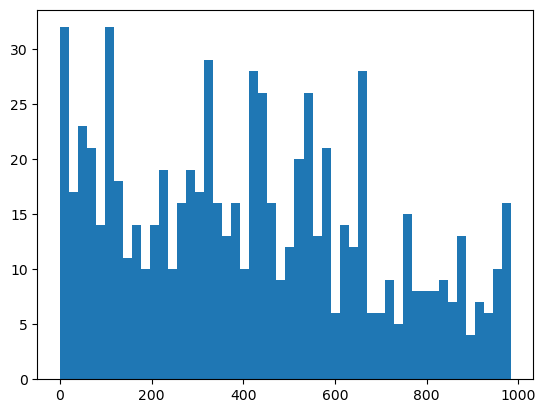


 SetPayment 

count    689.000000
mean     430.718433
std      267.041564
min        0.000000
25%      200.000000
50%      416.000000
75%      633.000000
max      984.000000
Name: difference, dtype: float64


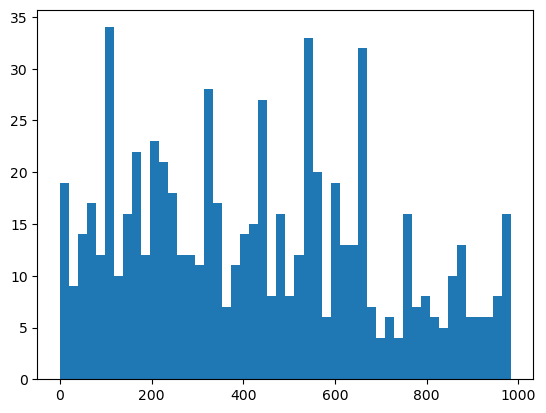


 GetPaymentMethods 

count    785.000000
mean     424.828025
std      263.925584
min        0.000000
25%      200.000000
50%      417.000000
75%      617.000000
max      984.000000
Name: difference, dtype: float64


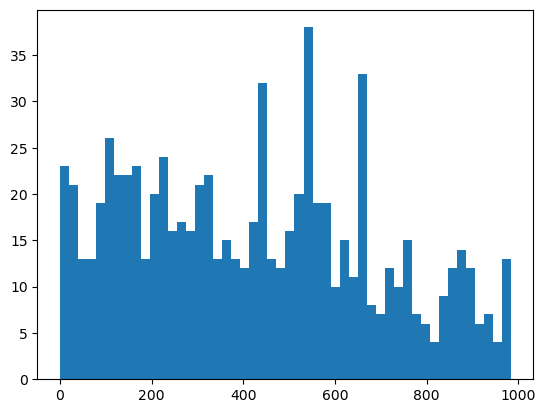


 SetDeliveryAddress 

count    664.000000
mean     427.545181
std      258.453116
min        0.000000
25%      217.000000
50%      416.000000
75%      616.250000
max      984.000000
Name: difference, dtype: float64


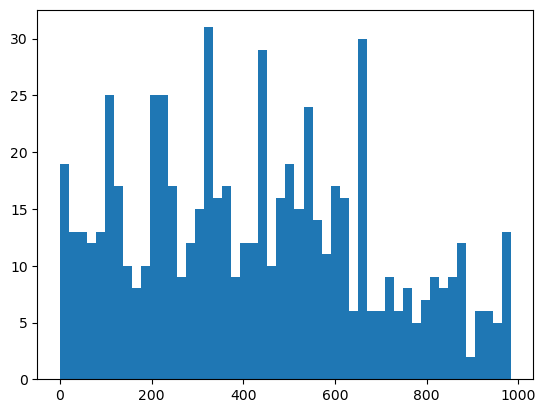


 ModifyOrder 

count    708.000000
mean     482.112994
std      284.231391
min        0.000000
25%      246.000000
50%      484.000000
75%      717.000000
max      984.000000
Name: difference, dtype: float64


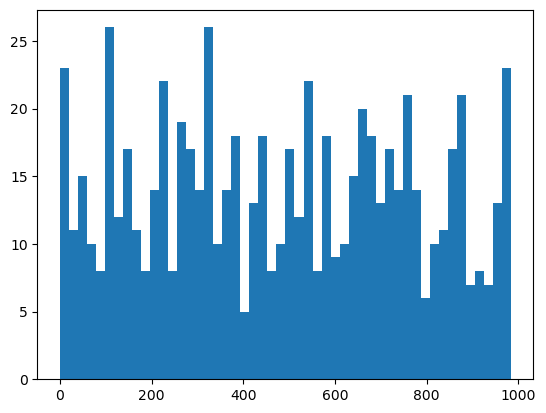


 GetItem 

count    735.000000
mean     430.065306
std      271.387230
min        0.000000
25%      200.000000
50%      400.000000
75%      633.000000
max      984.000000
Name: difference, dtype: float64


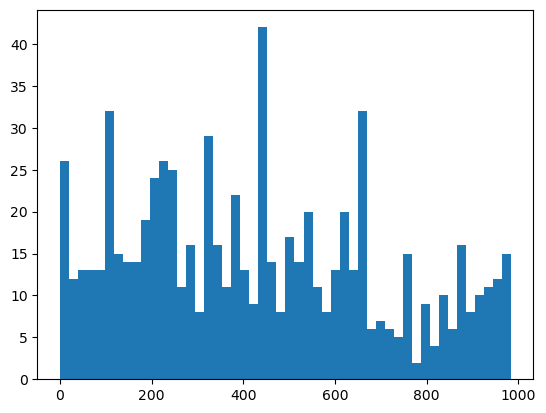


 AddItemToOrder 

count    698.000000
mean     416.110315
std      266.643805
min        0.000000
25%      183.000000
50%      400.000000
75%      612.000000
max      984.000000
Name: difference, dtype: float64


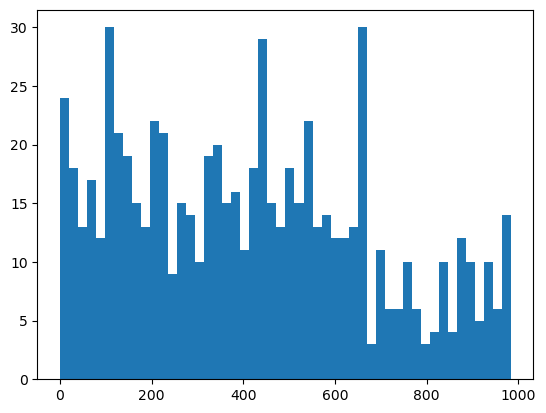


 ModifyItem 

count    732.000000
mean     484.419399
std      286.997205
min        0.000000
25%      233.000000
50%      484.000000
75%      733.000000
max      984.000000
Name: difference, dtype: float64


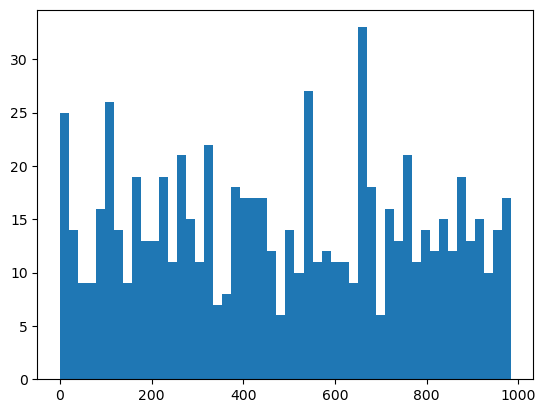


 GetOrder 

count    727.000000
mean     430.863824
std      271.095303
min        0.000000
25%      200.000000
50%      416.000000
75%      617.000000
max      984.000000
Name: difference, dtype: float64


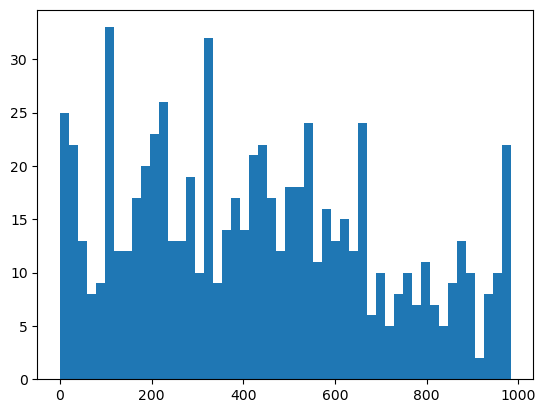


 GetOrderList 

count    738.000000
mean     424.672087
std      255.550165
min        0.000000
25%      216.000000
50%      400.000000
75%      617.000000
max      984.000000
Name: difference, dtype: float64


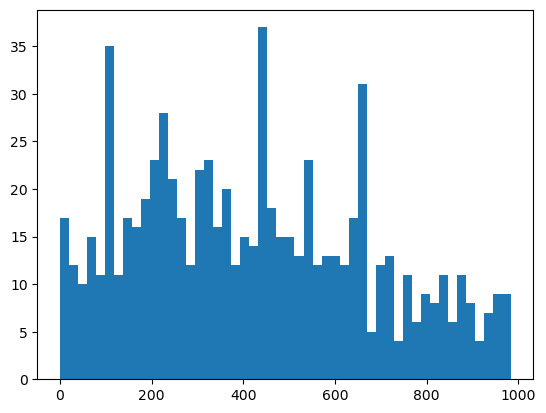


 GetItemList 

count    649.000000
mean     438.802773
std      266.538444
min        0.000000
25%      217.000000
50%      417.000000
75%      633.000000
max      984.000000
Name: difference, dtype: float64


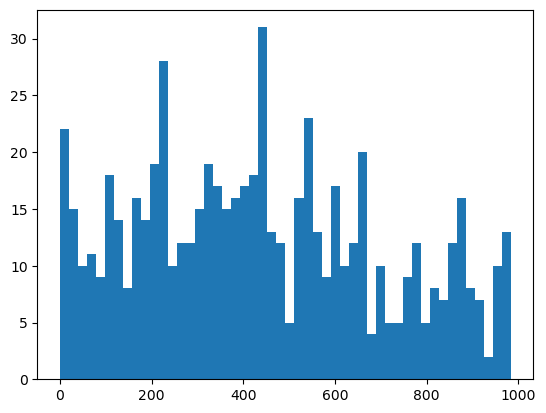


 SendNotification 

count    711.000000
mean     435.618847
std      264.947052
min        0.000000
25%      200.000000
50%      433.000000
75%      650.000000
max      984.000000
Name: difference, dtype: float64


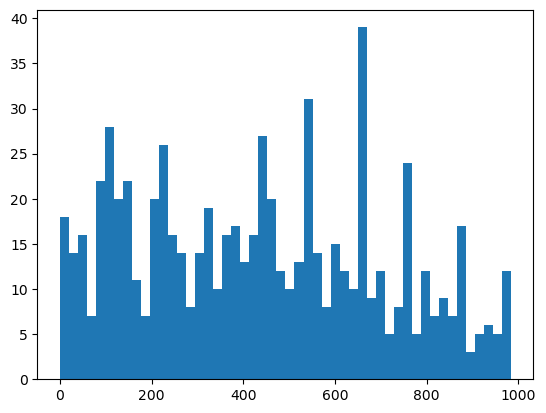


 GetPaymentList 

count    682.000000
mean     437.722874
std      266.875043
min        0.000000
25%      200.000000
50%      417.000000
75%      634.000000
max      984.000000
Name: difference, dtype: float64


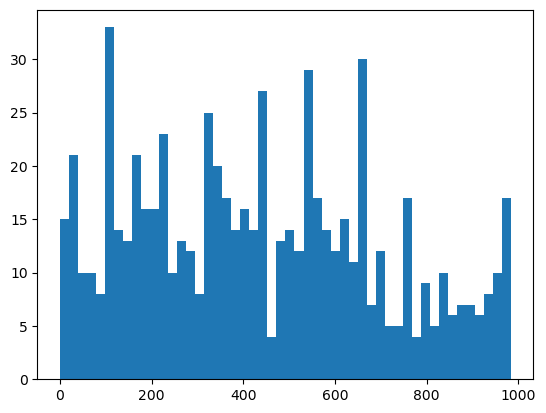


 Login 

count    733.000000
mean     422.050477
std      272.643458
min        0.000000
25%      167.000000
50%      416.000000
75%      633.000000
max      984.000000
Name: difference, dtype: float64


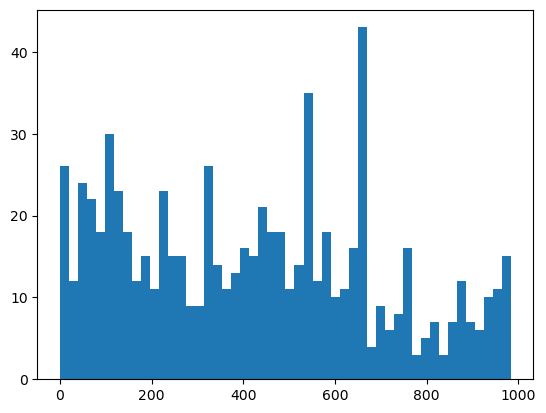

In [164]:
for i in c:
  print("\n", i, "\n")
  
  d = df[df.operation == i]
  print(d.difference.describe())
  plt.hist(d.difference, bins=50)
  plt.show()

<AxesSubplot:xlabel='difference', ylabel='operation'>

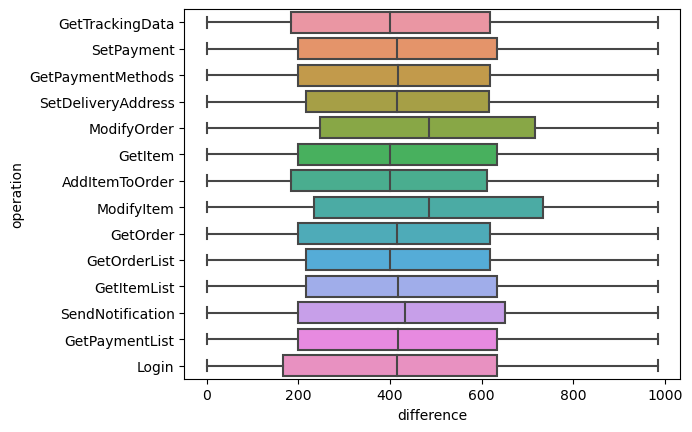

In [163]:
sns.boxplot(x="difference", y="operation", data=df)

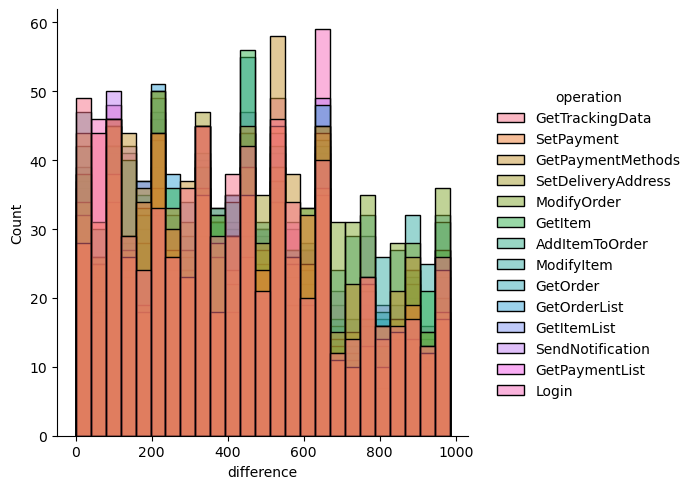

In [146]:
sns.displot(data=df, x="difference", hue="operation")